In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [ ]:
df_final = df
display(df_final)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
# feature selection by identifying top 1000 highly variable genes for each group

# Separate numerical and non-numerical columns
df_numeric = df_final.select_dtypes(include=np.number)
df_non_numeric = df_final.select_dtypes(exclude=np.number)


# Compute mean and variance for each gene
mean_expression = df_numeric.mean()
variance_expression = df_numeric.var()

# Compute the variance-to-mean ratio (VMR)
vmr = variance_expression / mean_expression
# Calculate the max VMR
max_vmr = vmr.max()

# Calculate the min VMR
min_vmr = vmr.min()

print("Max VMR:", max_vmr)
print("Min VMR:", min_vmr)




Max VMR: 3.84827255587954
Min VMR: 0.08548259767673895


In [ ]:

# Categorize genes into groups based on mean expression
bins = bins = [0,0.1,1,6]
groups = pd.cut(mean_expression, bins=bins)

# Create a DataFrame with VMR and groups
vmr_df = pd.DataFrame({'vmr': vmr, 'group': groups})
display(vmr_df)

,vmr,group
RP11-34P13.7,0.710797,"(0.0, 0.1]"
RP11-34P13.8,0.568170,"(0.0, 0.1]"
FO538757.2,0.905190,"(0.0, 0.1]"
AP006222.2,0.755794,"(0.0, 0.1]"
RP4-669L17.10,0.709255,"(0.0, 0.1]"
...,...,...
BX072566.1,0.328718,"(0.0, 0.1]"
AL354822.1,0.642319,"(0.0, 0.1]"
AC023491.2,0.304000,"(0.0, 0.1]"
AC004556.1,0.561487,"(0.0, 0.1]"


In [ ]:
# Count the number of occurrences of each unique value in the 'feature_group' column
counts = vmr_df['group'].value_counts()

print(counts)


(0.0, 0.1]    18864
(0.1, 1.0]     4818
(1.0, 6.0]      308
Name: group, dtype: int64


In [ ]:
selected_genes = vmr_df.groupby('group')['vmr'].nlargest(50)
selected_genes_indices = selected_genes.index.get_level_values(1)
print(len(selected_genes_indices))
print(selected_genes_indices)


150
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPL17', 'SOX4', 'HERPUD1', 'SORD', 'KRT18', 'TRPM4', 'DCXR', 'TMPRSS2',
       'BTG1', 'H2AFJ'],
      dtype='object', length=150)


In [ ]:
acc_list = []
num_high_list = []
num_feature_list = []
for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
  print(i)
  num_high_list.append(i)
  # For tach group, select the top i genes with the highest VMR
  selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)
  # Filter the original DataFrame to keep only the selected genes
  selected_genes_indices = selected_genes.index.get_level_values(1)
  selected_genes_df = df_numeric[selected_genes_indices]
  print(len(selected_genes_indices))
  num_feature_list.append(len(selected_genes_indices))
  print(selected_genes_indices)
  # Concatenate the numerical and non-numerical data
  df_hvg = pd.concat([selected_genes_df, df_non_numeric], axis=1)
  X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
  y = df_hvg['tumourID']


  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Random Forest
  model = RandomForestClassifier(n_estimators=100)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
  acc_list.append(accuracy_score(y_test, y_pred))
  # Now get the unique class labels
  class_labels = y.unique()

  # Generate the classification report
  report = classification_report(y_test, y_pred, target_names=class_labels)

  print(report)

1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')
Random Forest Accuracy: 0.5104872539528881
              precision    recall  f1-score   support

       SC162       0.50      0.83      0.62       917
       SC174       0.76      0.79      0.77       429
       SC172       0.34      0.17      0.22       487
       SC177       0.25      0.10      0.14       681
       SC156       0.54      0.58      0.56       585

    accuracy                           0.51      3099
   macro avg       0.48      0.49      0.46      3099
weighted avg       0.46      0.51      0.46      3099

3
9
Index(['IL5', 'CSRP3', 'ACTC1', 'TPSB2', 'CST1', 'TPSAB1', 'MSMB', 'SPON2',
       'TFF3'],
      dtype='object')
Random Forest Accuracy: 0.8712487899322362
              precision    recall  f1-score   support

       SC162       0.87      0.90      0.88       917
       SC174       0.93      0.95      0.94       429
       SC172       0.92      0.85      0.89       487
       SC177       0.75      0.76     

In [ ]:

acc_list.append(0.9632)
num_feature_list.append('all features')
num_high_list.append('all features')
print(acc_list)
print(num_high_list)
print(num_feature_list)


[0.5104872539528881, 0.8712487899322362, 0.9177153920619555, 0.9444982252339464, 0.9809616005162956, 0.9854791868344628, 0.9870926105195225, 0.9854791868344628, 0.9825750242013552, 0.9809616005162956, 0.9657954178767344, 0.9645046789286866, 0.9632139399806389, 0.9632]
[1, 3, 5, 10, 30, 50, 70, 100, 500, 1000, 5000, 10000, 15000, 'all features']
[3, 9, 15, 30, 90, 150, 210, 300, 1308, 2308, 10126, 15126, 20126, 'all features']


In [ ]:
str_num_high_list = []
str_num_feature_list = []
for i in range(len(num_high_list)):
  str_num_high_list.append(str(num_high_list[i]))
  str_num_feature_list.append(str(num_feature_list[i]))



In [ ]:
str_num_feature_list_reversed = str_num_feature_list[::-1]
str_num_high_list_reversed = str_num_high_list[::-1]
acc_list_reversed = acc_list[::-1]
print(str_num_feature_list_reversed)
print(str_num_high_list_reversed)
print(acc_list_reversed)

['all features', '20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']
['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']
[0.9632, 0.9632139399806389, 0.9645046789286866, 0.9657954178767344, 0.9809616005162956, 0.9825750242013552, 0.9854791868344628, 0.9870926105195225, 0.9854791868344628, 0.9809616005162956, 0.9444982252339464, 0.9177153920619555, 0.8712487899322362, 0.5104872539528881]


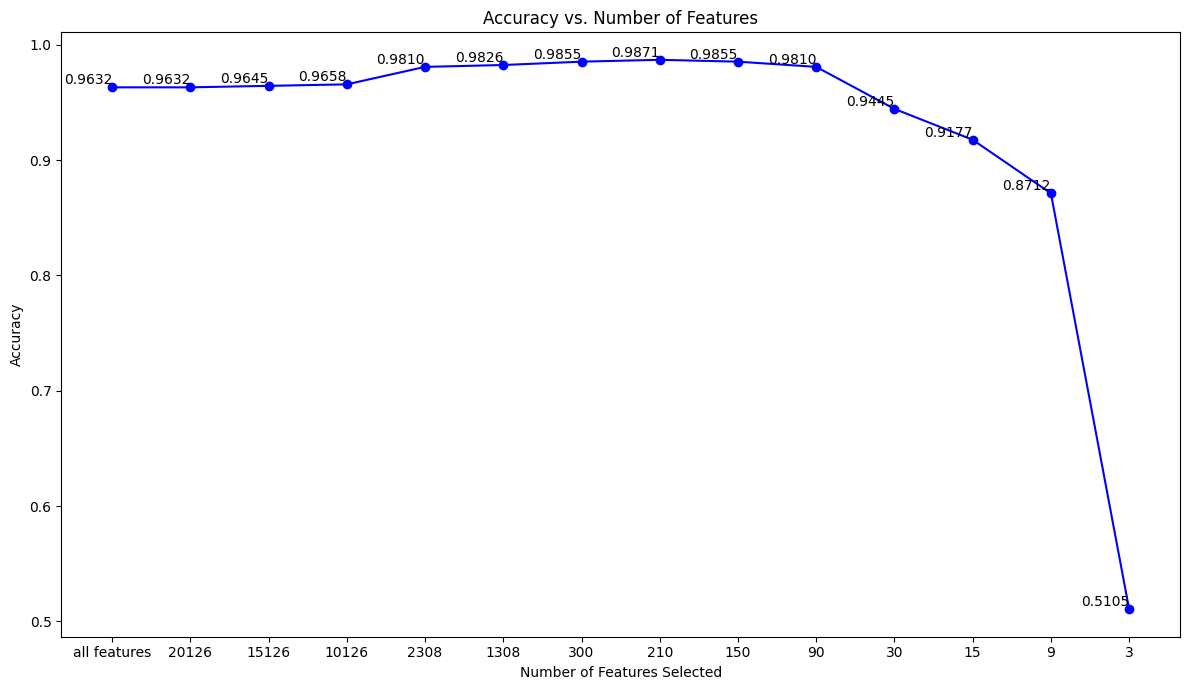

In [ ]:

plt.figure(figsize=(12, 7))
plt.plot(str_num_feature_list_reversed, acc_list_reversed, marker='o', linestyle='-', color='b')

for i, txt in enumerate(acc_list_reversed):
    plt.text(str_num_feature_list_reversed[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')

plt.tight_layout()
plt.savefig("acc_features_vmr_rf.png")
plt.show()

## SVM


In [ ]:
acc_list_SVM = []
num_high_list_SVM = []
num_feature_list_SVM = []
for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
  print(i)
  num_high_list_SVM.append(i)
  # For tach group, select the top i genes with the highest VMR
  selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)
  # Filter the original DataFrame to keep only the selected genes
  selected_genes_indices = selected_genes.index.get_level_values(1)
  selected_genes_df = df_numeric[selected_genes_indices]
  print(len(selected_genes_indices))
  num_feature_list_SVM.append(len(selected_genes_indices))
  print(selected_genes_indices)
  # Concatenate the numerical and non-numerical data
  df_hvg = pd.concat([selected_genes_df, df_non_numeric], axis=1)
  X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
  y = df_hvg['tumourID']


  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearSVC(max_iter=1000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
  # Now get the unique class labels
  class_labels = y.unique()
  # Generate the classification report
  report = classification_report(y_test, y_pred, target_names=class_labels)
  print(report)
  acc_list_SVM.append(accuracy_score(y_test, y_pred))
  # Now get the unique class labels
  class_labels = y.unique()

  # Generate the classification report
  report = classification_report(y_test, y_pred, target_names=class_labels)

  print(report)

1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

Linear SVM Accuracy: 0.5434010971281058
              precision    recall  f1-score   support

       SC162       0.48      0.95      0.64       917
       SC174       0.80      0.85      0.83       429
       SC172       0.00      0.00      0.00       487
       SC177       0.73      0.03      0.05       681
       SC156       0.54      0.73      0.62       585

    accuracy                           0.54      3099
   macro avg       0.51      0.51      0.43      3099
weighted avg       0.52      0.54      0.43      3099

              precision    recall  f1-score   support

       SC162       0.48      0.95      0.64       917
       SC174       0.80      0.85      0.83       429
       SC172       0.00      0.00      0.00       487
       SC177       0.73      0.03      0.05       681
       SC156       0.54      0.73      0.62       585

    accuracy                           0.54      3099
   macro avg       0.51      0.51      0.43      3099
weighted avg       0.52      0.54    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8270409809616005
              precision    recall  f1-score   support

       SC162       0.77      0.92      0.84       917
       SC174       0.89      0.96      0.92       429
       SC172       0.93      0.82      0.87       487
       SC177       0.72      0.55      0.62       681
       SC156       0.91      0.91      0.91       585

    accuracy                           0.83      3099
   macro avg       0.84      0.83      0.83      3099
weighted avg       0.83      0.83      0.82      3099

              precision    recall  f1-score   support

       SC162       0.77      0.92      0.84       917
       SC174       0.89      0.96      0.92       429
       SC172       0.93      0.82      0.87       487
       SC177       0.72      0.55      0.62       681
       SC156       0.91      0.91      0.91       585

    accuracy                           0.83      3099
   macro avg       0.84      0.83      0.83      3099
weighted avg       0.83      0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8570506615037109
              precision    recall  f1-score   support

       SC162       0.78      0.96      0.86       917
       SC174       0.90      0.95      0.92       429
       SC172       0.92      0.84      0.88       487
       SC177       0.86      0.61      0.71       681
       SC156       0.93      0.93      0.93       585

    accuracy                           0.86      3099
   macro avg       0.88      0.86      0.86      3099
weighted avg       0.86      0.86      0.85      3099

              precision    recall  f1-score   support

       SC162       0.78      0.96      0.86       917
       SC174       0.90      0.95      0.92       429
       SC172       0.92      0.84      0.88       487
       SC177       0.86      0.61      0.71       681
       SC156       0.93      0.93      0.93       585

    accuracy                           0.86      3099
   macro avg       0.88      0.86      0.86      3099
weighted avg       0.86      0.86    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8970635688931914
              precision    recall  f1-score   support

       SC162       0.86      0.95      0.90       917
       SC174       0.93      0.96      0.95       429
       SC172       0.94      0.90      0.92       487
       SC177       0.85      0.74      0.79       681
       SC156       0.96      0.95      0.95       585

    accuracy                           0.90      3099
   macro avg       0.91      0.90      0.90      3099
weighted avg       0.90      0.90      0.90      3099

              precision    recall  f1-score   support

       SC162       0.86      0.95      0.90       917
       SC174       0.93      0.96      0.95       429
       SC172       0.94      0.90      0.92       487
       SC177       0.85      0.74      0.79       681
       SC156       0.96      0.95      0.95       585

    accuracy                           0.90      3099
   macro avg       0.91      0.90      0.90      3099
weighted avg       0.90      0.90    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.9783801226202
              precision    recall  f1-score   support

       SC162       0.99      0.98      0.99       917
       SC174       0.98      0.99      0.99       429
       SC172       0.98      0.95      0.97       487
       SC177       0.95      0.98      0.96       681
       SC156       0.99      0.98      0.99       585

    accuracy                           0.98      3099
   macro avg       0.98      0.98      0.98      3099
weighted avg       0.98      0.98      0.98      3099

              precision    recall  f1-score   support

       SC162       0.99      0.98      0.99       917
       SC174       0.98      0.99      0.99       429
       SC172       0.98      0.95      0.97       487
       SC177       0.95      0.98      0.96       681
       SC156       0.99      0.98      0.99       585

    accuracy                           0.98      3099
   macro avg       0.98      0.98      0.98      3099
weighted avg       0.98      0.98      0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.9854791868344628
              precision    recall  f1-score   support

       SC162       0.99      0.99      0.99       917
       SC174       0.99      1.00      0.99       429
       SC172       0.99      0.97      0.98       487
       SC177       0.96      0.98      0.97       681
       SC156       1.00      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.98      0.99      3099
weighted avg       0.99      0.99      0.99      3099

              precision    recall  f1-score   support

       SC162       0.99      0.99      0.99       917
       SC174       0.99      1.00      0.99       429
       SC172       0.99      0.97      0.98       487
       SC177       0.96      0.98      0.97       681
       SC156       1.00      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.98      0.99      3099
weighted avg       0.99      0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.989028718941594
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       0.99      1.00      0.99       429
       SC172       0.98      0.98      0.98       487
       SC177       0.98      0.98      0.98       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099

              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       0.99      1.00      0.99       429
       SC172       0.98      0.98      0.98       487
       SC177       0.98      0.98      0.98       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99     

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.9864472410454985
              precision    recall  f1-score   support

       SC162       0.99      1.00      1.00       917
       SC174       0.99      1.00      0.99       429
       SC172       0.97      0.96      0.97       487
       SC177       0.97      0.98      0.98       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099

              precision    recall  f1-score   support

       SC162       0.99      1.00      1.00       917
       SC174       0.99      1.00      0.99       429
       SC172       0.97      0.96      0.97       487
       SC177       0.97      0.98      0.98       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.9964504678928686
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.99      0.99       487
       SC177       0.99      0.99      0.99       681
       SC156       1.00      1.00      1.00       585

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00      1.00      3099

              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.99      0.99       487
       SC177       0.99      0.99      0.99       681
       SC156       1.00      1.00      1.00       585

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00    

In [ ]:
acc_list_SVM.append(0.9971)
num_feature_list_SVM.append('all features')
num_high_list_SVM.append('all features')
print(acc_list_SVM)
print(num_high_list_SVM)
print(num_feature_list_SVM)


[0.5434010971281058, 0.8270409809616005, 0.8570506615037109, 0.8970635688931914, 0.9783801226202, 0.9854791868344628, 0.989028718941594, 0.9864472410454985, 0.9964504678928686, 0.9964504678928686, 0.9967731526298806, 0.9967731526298806, 0.9967731526298806, 0.9971]
[1, 3, 5, 10, 30, 50, 70, 100, 500, 1000, 5000, 10000, 15000, 'all features']
[3, 9, 15, 30, 90, 150, 210, 300, 1308, 2308, 10126, 15126, 20126, 'all features']


In [ ]:
str_num_high_list_SVM = []
str_num_feature_list_SVM= []
for i in range(len(num_high_list_SVM)):
  str_num_high_list_SVM.append(str(num_high_list_SVM[i]))
  str_num_feature_list_SVM.append(str(num_feature_list_SVM[i]))
str_num_feature_list_reversed_SVM = str_num_feature_list_SVM[::-1]
str_num_high_list_reversed_SVM = str_num_high_list_SVM[::-1]
print(str_num_feature_list_reversed_SVM)
print(str_num_high_list_reversed_SVM)
acc_list_reversed_SVM = acc_list_SVM[::-1]
print(acc_list_reversed_SVM)


['all features', '20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']
['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']
[0.9971, 0.9967731526298806, 0.9967731526298806, 0.9967731526298806, 0.9964504678928686, 0.9964504678928686, 0.9864472410454985, 0.989028718941594, 0.9854791868344628, 0.9783801226202, 0.8970635688931914, 0.8570506615037109, 0.8270409809616005, 0.5434010971281058]


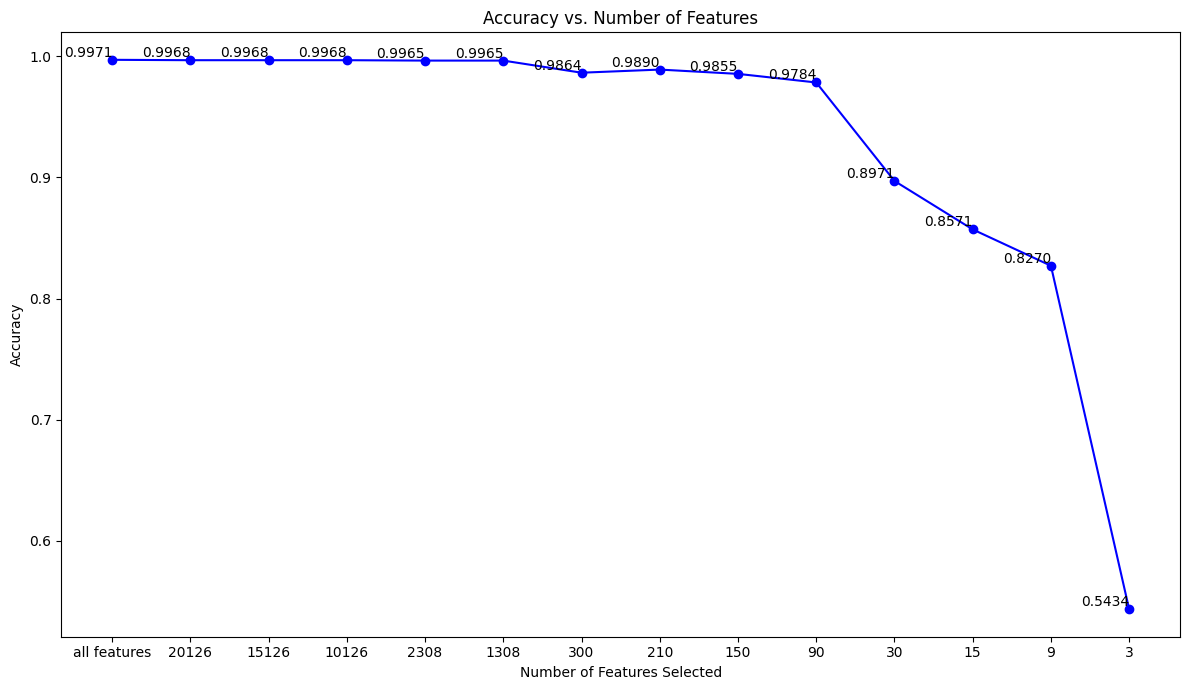

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(str_num_feature_list_reversed_SVM, acc_list_reversed_SVM, marker='o', linestyle='-', color='b')

for i, txt in enumerate(acc_list_reversed_SVM):
    plt.text(str_num_feature_list_reversed_SVM[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')

plt.tight_layout()
plt.savefig("acc_features_vmr_rf.png")
plt.show()

1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')
XGBoost Accuracy: 0.5566311713455954
              precision    recall  f1-score   support

       SC162       0.52      0.90      0.66       917
       SC174       0.83      0.84      0.83       429
       SC172       0.35      0.21      0.26       487
       SC177       0.43      0.07      0.11       681
       SC156       0.57      0.67      0.62       585

    accuracy                           0.56      3099
   macro avg       0.54      0.54      0.50      3099
weighted avg       0.53      0.56      0.49      3099

3
9
Index(['IL5', 'CSRP3', 'ACTC1', 'TPSB2', 'CST1', 'TPSAB1', 'MSMB', 'SPON2',
       'TFF3'],
      dtype='object')
XGBoost Accuracy: 0.877702484672475
              precision    recall  f1-score   support

       SC162       0.87      0.90      0.88       917
       SC174       0.93      0.95      0.94       429
       SC172       0.95      0.86      0.90       487
       SC177       0.76      0.78      0.77       6

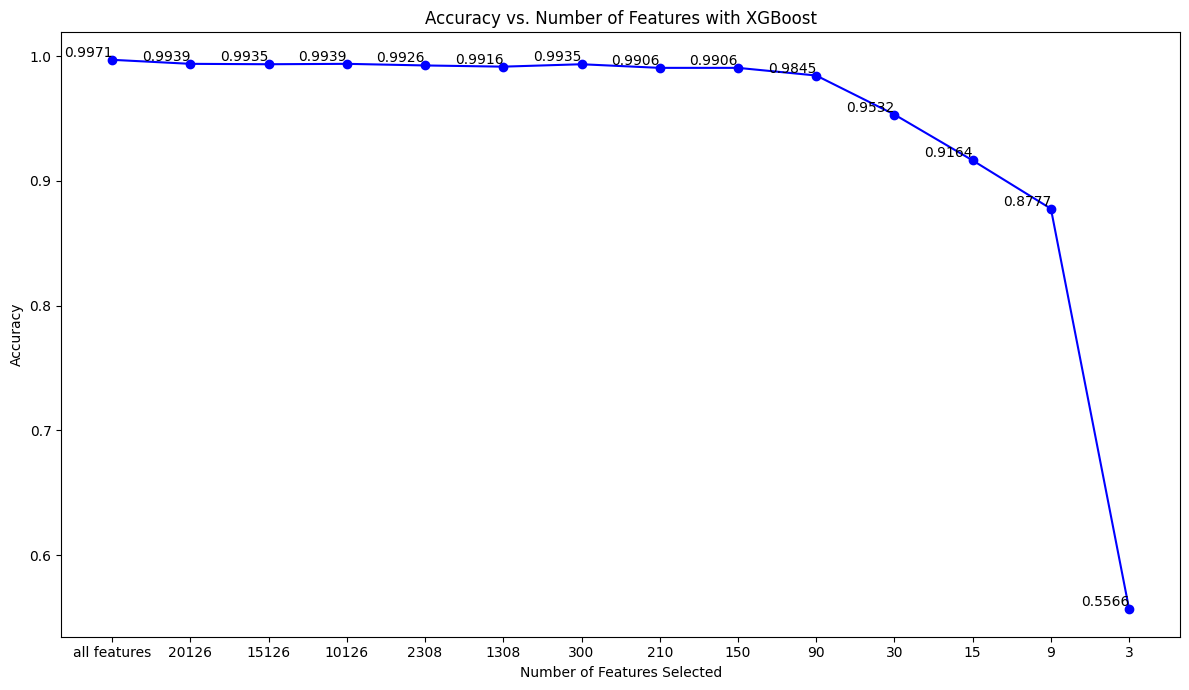

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Create lists to store results
acc_list_XGB = []
num_high_list_XGB = []
num_feature_list_XGB = []

for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
    print(i)
    num_high_list_XGB.append(i)
    # For each group, select the top i genes with the highest VMR
    selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)
    # Filter the original DataFrame to keep only the selected genes
    selected_genes_indices = selected_genes.index.get_level_values(1)
    selected_genes_df = df_numeric[selected_genes_indices]

    print(len(selected_genes_indices))
    num_feature_list_XGB.append(len(selected_genes_indices))
    print(selected_genes_indices)

    # Concatenate the numerical and non-numerical data
    df_hvg = pd.concat([selected_genes_df, df_non_numeric], axis=1)
    X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
    y = df_hvg['tumourID']

    # Split the data into training and test sets
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


    # Use XGBoost Classifier
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print results
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    class_labels = y.unique()
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)

    acc_list_XGB.append(accuracy_score(y_test, y_pred))


In [ ]:

# Append accuracy for all features
acc_list_XGB[-1] =0.9868
num_feature_list_XGB.append('all features')
num_high_list_XGB.append('all features')

# Print results
print(acc_list_XGB)
print(num_high_list_XGB)
print(num_feature_list_XGB)

# Convert lists to string for plotting
str_num_high_list_XGB = [str(x) for x in num_high_list_XGB]
str_num_feature_list_XGB = [str(x) for x in num_feature_list_XGB]
str_num_feature_list_reversed_XGB = str_num_feature_list_XGB[::-1]
str_num_high_list_reversed_XGB = str_num_high_list_XGB[::-1]

# Reverse the accuracy list for plotting
acc_list_reversed_XGB = acc_list_XGB[::-1]

# Plot
plt.figure(figsize=(12, 7))
plt.plot(str_num_feature_list_reversed_XGB, acc_list_reversed_XGB, marker='o', linestyle='-', color='b')

for i, txt in enumerate(acc_list_reversed_XGB):
    plt.text(str_num_feature_list_reversed_XGB[i], txt, f"{txt:.4f}", ha='right', va='bottom')

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features with XGBoost')

plt.tight_layout()
plt.savefig("acc_features_vmr_xgb.png")
plt.show()


NameError: ignored

In [ ]:
feature_num = ['all features', '20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']
num_per_group = ['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']
rf = [0.9632, 0.9632139399806389, 0.9645046789286866, 0.9657954178767344, 0.9809616005162956, 0.9825750242013552, 0.9854791868344628, 0.9870926105195225, 0.9854791868344628, 0.9809616005162956, 0.9444982252339464, 0.9177153920619555, 0.8712487899322362, 0.5104872539528881]

xgboost = [0.9971,
 0.9938689899967732,
 0.9935463052597612,
 0.9938689899967732,
 0.9925782510487254,
 0.9916101968376896,
 0.9935463052597612,
 0.9906421426266537,
 0.9906421426266537,
 0.9845111326234269,
 0.9532107131332688,
 0.9164246531139078,
 0.877702484672475,
 0.5566311713455954]
svm = [0.9971, 0.9967731526298806, 0.9967731526298806, 0.9967731526298806, 0.9964504678928686, 0.9964504678928686, 0.9864472410454985, 0.989028718941594, 0.9854791868344628, 0.9783801226202, 0.8970635688931914, 0.8570506615037109, 0.8270409809616005, 0.5434010971281058]


In [4]:
svm = [0.9971, 0.9967731526298806, 0.9967731526298806, 0.9864472410454985, 0.9854791868344628, 0.9783801226202, 0.8970635688931914, 0.8570506615037109, 0.8270409809616005, 0.5434010971281058]

xgboost = [0.9932,
 0.9935463052597612,
 0.9925782510487254,
 0.9935463052597612,
 0.9906421426266537,
 0.9845111326234269,
 0.9532107131332688,
 0.9164246531139078,
 0.877702484672475,
 0.5566311713455954]
num_per_group = ['all features', '10000', '1000', '100', '50', '30', '10', '5', '3', '1']


In [5]:
svm.reverse()

In [7]:
xgboost.reverse()


In [8]:
num_per_group.reverse()

<ipython-input-25-04627ed2c3ac>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


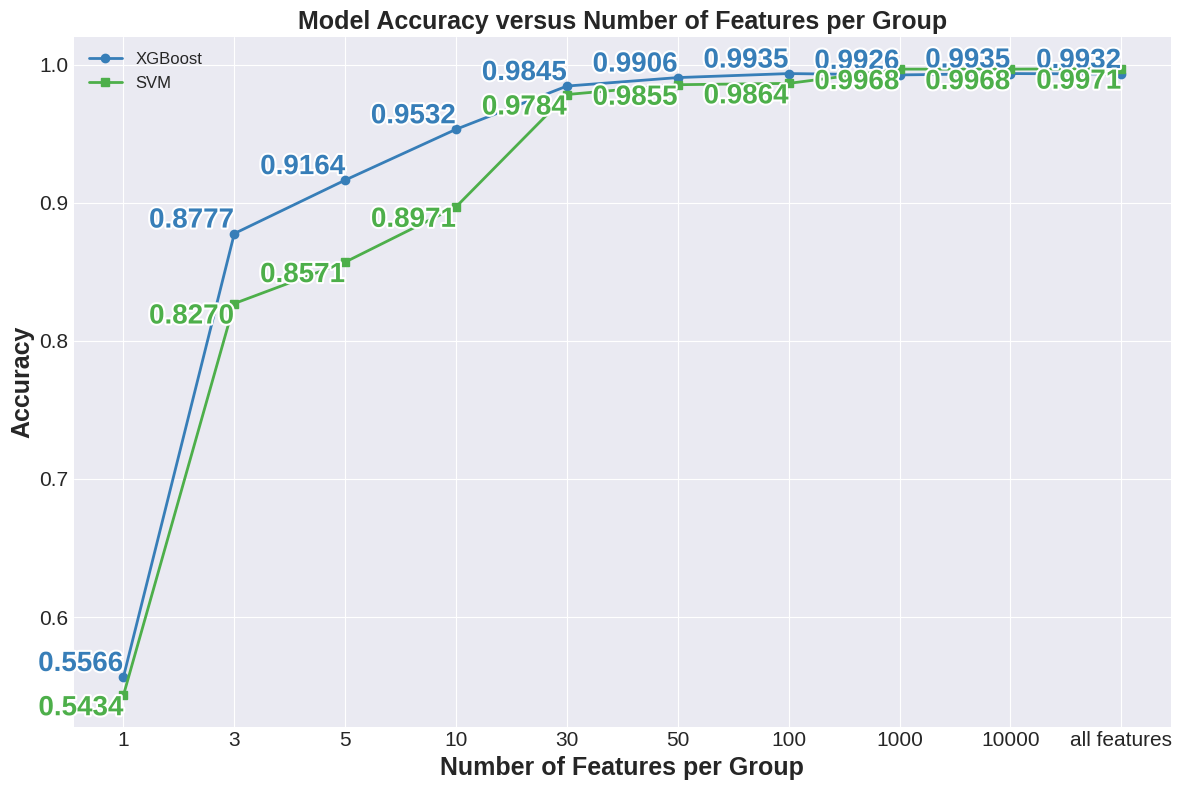

In [25]:
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Setting style
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 8))

# Adjusting plot properties for aesthetic enhancements
palette = plt.get_cmap('Set1')

# Using varied line styles and markers for better distinction
# Uncomment the below line if you have data for Random Forest
# plt.plot(num_per_group, rf, label='Random Forest', marker='o', linestyle='-', color=palette(0))

plt.plot(num_per_group, xgboost, label='XGBoost', marker='o', linestyle='-', color=palette(1), linewidth=2)
plt.plot(num_per_group, svm, label='SVM', marker='s', linestyle='-', color=palette(2), linewidth=2)

# Adding shadow to text for better readability
for i, txt in enumerate(xgboost):
    plt.text(num_per_group[i], txt, f"{txt:.4f}", ha='right', va='bottom', color=palette(1), fontsize=20, fontweight='bold', path_effects=[
             patheffects.withStroke(linewidth=3, foreground='white')])

for i, txt in enumerate(svm):
    plt.text(num_per_group[i], txt, f"{txt:.4f}", ha='right', va='top', color=palette(2), fontsize=20, fontweight='bold', path_effects=[
             patheffects.withStroke(linewidth=3, foreground='white')])

plt.xlabel('Number of Features per Group', fontsize=18,fontweight='bold',)
plt.ylabel('Accuracy', fontsize=18,fontweight='bold',)
plt.title('Model Accuracy versus Number of Features per Group', fontsize=18,fontweight='bold',)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

# Adding grid lines for better data visualization
plt.grid(True)

# Adding legend with increased font size
plt.legend(fontsize='large')

# Applying tight layout to avoid clipping and save the plot as an image file
plt.tight_layout()
plt.savefig("gene_selection_svm.png")

# Displaying the plot
plt.show()



In [26]:
rf = [0.9632, 0.9632139399806389, 0.9645046789286866, 0.9657954178767344, 0.9809616005162956, 0.9825750242013552, 0.9854791868344628, 0.9870926105195225, 0.9854791868344628, 0.9809616005162956, 0.9444982252339464, 0.9177153920619555, 0.8712487899322362, 0.5104872539528881]
rf.reverse()

In [28]:
num_per_group = ['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']
num_per_group.reverse()

<ipython-input-39-92693c0fcc92>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


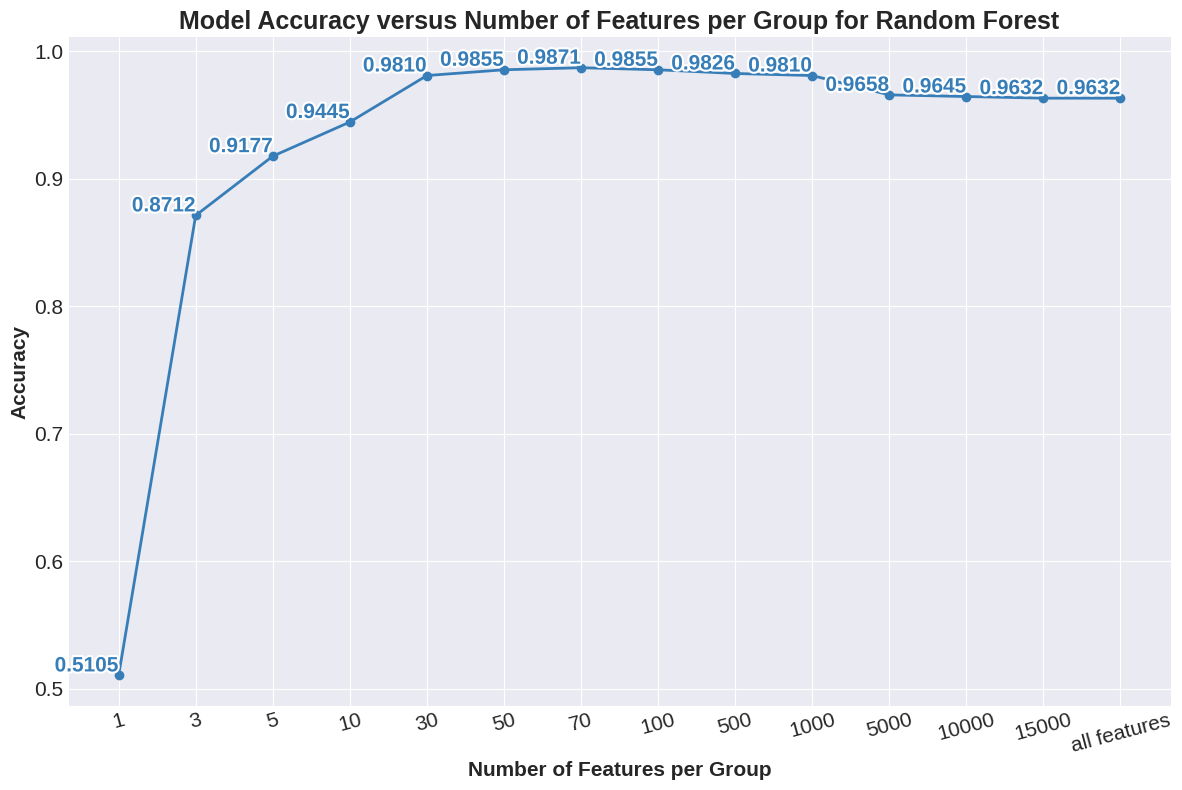

In [39]:
import matplotlib.pyplot as plt
from matplotlib import patheffects


# Setting style
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 8))


# Plot data with more vibrant color and line width
plt.plot(num_per_group, rf, label='Random Forest', marker='o', linestyle='-', color=palette(1), linewidth=2)

# Add text labels with shadow for better visibility
for i, txt in enumerate(rf):
    plt.text(num_per_group[i], txt, f"{txt:.4f}", ha='right', va='bottom', fontsize=15, fontweight='bold', color=palette(1), path_effects=[
        patheffects.withStroke(linewidth=3, foreground='white')
    ])

# Make axis labels and title more prominent
plt.xlabel('Number of Features per Group', fontsize=15,fontweight='bold')
plt.ylabel('Accuracy', fontsize=15, fontweight='bold')
plt.title('Model Accuracy versus Number of Features per Group for Random Forest', fontsize=18, fontweight='bold')

# Enhance visibility of x-axis values
plt.xticks(rotation=15, fontsize=15)
plt.yticks(fontsize=15)

# Add grid lines for better readability
plt.grid(True)
# Apply a tight layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("gene_selection_rf.png")

# Display the plot
plt.show()


<ipython-input-46-ef4cb6ce2855>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


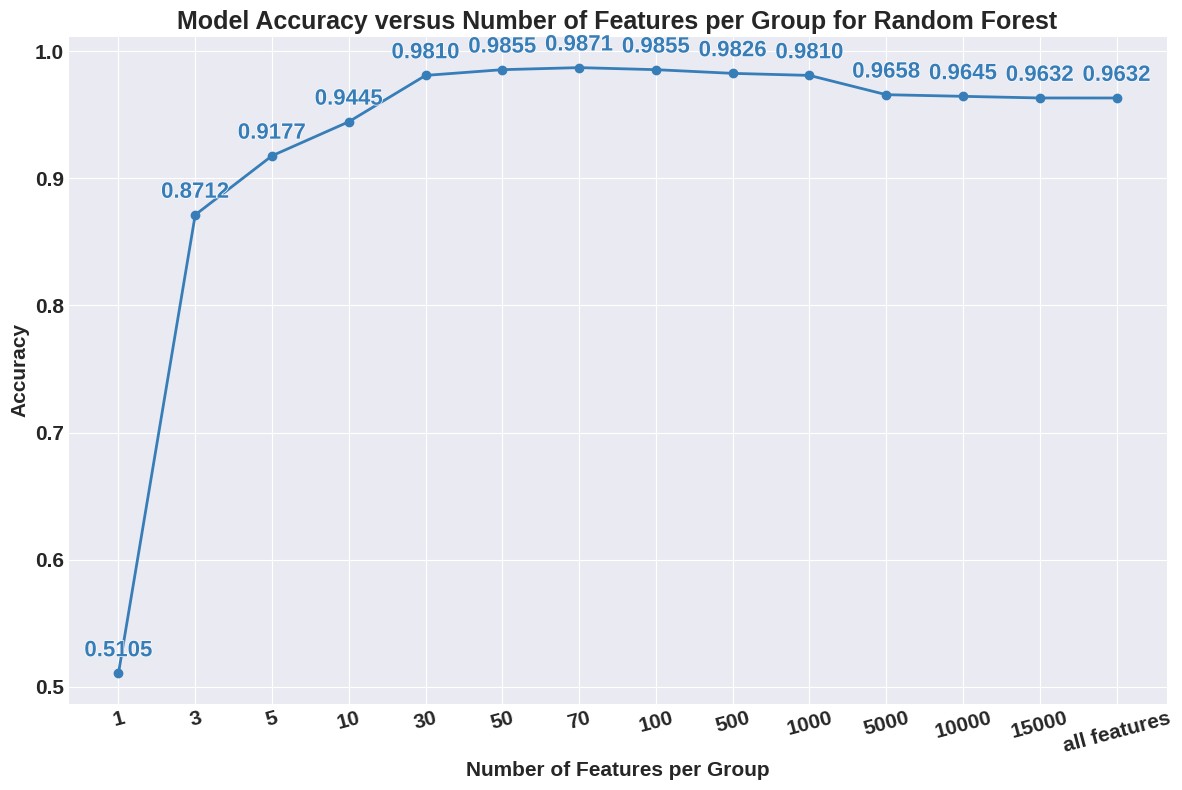

In [46]:
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Setting style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(12, 8))

# Plot data with more vibrant color and line width
plt.plot(num_per_group, rf, label='Random Forest', marker='o', linestyle='-', color=palette(1), linewidth=2)

# Add text labels with shadow for better visibility, and adjust positions to prevent overlap
for i, txt in enumerate(rf):
    x_pos = num_per_group[i]
    y_pos = txt
    y_offset = (max(rf) - min(rf)) * 0.02 # 2% of the range of rf values, adjust as necessary

    plt.text(x_pos, y_pos + y_offset, f"{txt:.4f}", ha='center', va='bottom', fontsize=16, fontweight='bold', color=palette(1), path_effects=[
        patheffects.withStroke(linewidth=1, foreground='white')
    ])

# Make axis labels and title more prominent
plt.xlabel('Number of Features per Group', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy', fontsize=15, fontweight='bold')
plt.title('Model Accuracy versus Number of Features per Group for Random Forest', fontsize=18, fontweight='bold')

# Enhance visibility of x-axis values
plt.xticks(rotation=15, fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Add grid lines for better readability
plt.grid(True)

# Apply a tight layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("gene_selection_rf.png")

# Display the plot
plt.show()
